This data set of size n = 15 contains measurements of yield from an experiment done at five different temperature levels. The variables are y = yield and x = temperature in degrees Fahrenheit. The table below gives the data used for this analysis.

https://onlinecourses.science.psu.edu/stat501/node/325/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
random_state = 42

## Load Data

In [2]:
data = pd.read_csv('yield.csv')
data.head()

,Temp,Yield
0,50,3.3
1,50,2.8
2,50,2.9
3,70,2.3
4,70,2.6


### Display data 

In [3]:
def display_plot(X, y, y_pred = None):
    plt.figure(figsize= (10,6))
    plt.scatter(X, y)
    if y_pred is not None:
       plt.plot(X, y_pred, color = 'red' )    
    plt.xlabel('temperature', fontsize = 12)
    plt.ylabel('yield', fontsize = 12)
    plt.title('Temperature vs Yield')    
    plt.show()



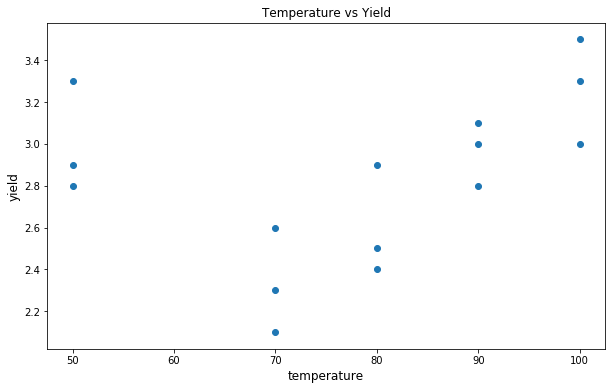

In [4]:
display_plot(data.Temp, data.Yield)

### Display Correlation Matrix
We can see that teher is low correlation between tempertaure and Yiled. Will simple Linear regerssion work?
We will find this out in next section

In [5]:
def display_corr_matrix(data):  
    cor_matrix = data.corr().round(2)
    fig = plt.figure(figsize=(6, 6));
    sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
    plt.show()



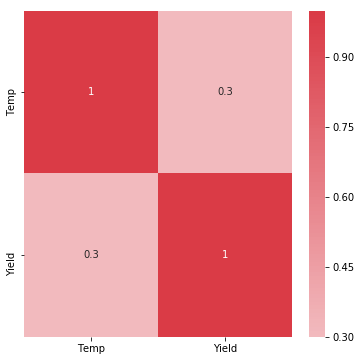

In [6]:
display_corr_matrix(data)

## Train Linear Model: Underfitting
We  will train the model on training data. Since data points are less we will not use test set 

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error

# data needs to be reshaped to 2 dimensions as alogorithm expects the data in two dimensions
X_train = data.Temp.values.reshape(-1,1)
y_train  = data.Yield.values.reshape(-1,1)

#Fit Linear Regression Model
model = LinearRegression( )
model.fit(X_train, y_train)

#Predict the output on training set
y_pred = model.predict(X_train)

#calculate root mean squared error
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
print('Training RMSE is', rmse)

Training RMSE is 0.364292065119059


#### Display the Fitted Line
We can see from the graph that our model is underfitted because there are many points in the graph which are far from fitted line. The RMSE of 0.36429 also is on higher side. In next section we will try polynomial regression to get better RMSE score

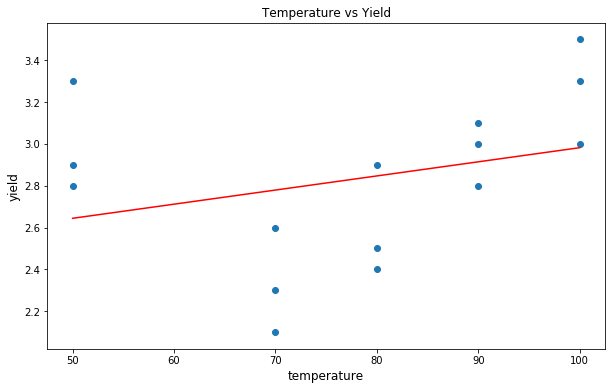

In [8]:
display_plot(X_train, y_train, y_pred)

## Polynomial Regression: Ideal Model
We will convert the temerature into polynomial of degree 2 which will add a squared term in training set as second column


### Create Polynomial Features

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X_train)

X_poly

array([[   50.,  2500.],
       [   50.,  2500.],
       [   50.,  2500.],
       [   70.,  4900.],
       [   70.,  4900.],
       [   70.,  4900.],
       [   80.,  6400.],
       [   80.,  6400.],
       [   80.,  6400.],
       [   90.,  8100.],
       [   90.,  8100.],
       [   90.,  8100.],
       [  100., 10000.],
       [  100., 10000.],
       [  100., 10000.]])

### Train The Model

Now train the Linear regression Model on polynomial features. Note our training has an additional feature which is squared value of temeperature since we used a degree of 2

The RMSE of 0.218 is much better than RMSE of 0.364 when simple regression model was run. 
Try varying the degree of of ploynomial to get optimum results

In [10]:
model = LinearRegression( )
model.fit(X_poly, y_train)


y_pred = model.predict(X_poly)
mse = mean_squared_error(y_train, y_pred)

rmse = np.sqrt(mse)
print('Training RMSE is', rmse)

Training RMSE is 0.2185970050801511


#### Dislay the Fitted curve: Ideal Model
Instead of fitting a line as in Linear regression, we will fit a curve for polynomial regerssion .
As we can see the curve is more accurate representation of the data points 

We will also print the equation of the curve

In [11]:
def display_poly_data(model, X, y ):
    plt.figure(figsize= (10,6))
    X_grid = np.linspace(50, 100, 100).reshape(-1,1)
    X_grid_poly = poly_features.fit_transform(X_grid)
    y_grid  = model.predict(X_grid_poly)
    plt.scatter(X, y)
    plt.plot(X_grid, y_grid, color = 'red')
    plt.xlabel('temperature', fontsize = 12)
    plt.ylabel('yield', fontsize = 12)
    plt.title('Temperature vs Yield')   
    plt.show()
    


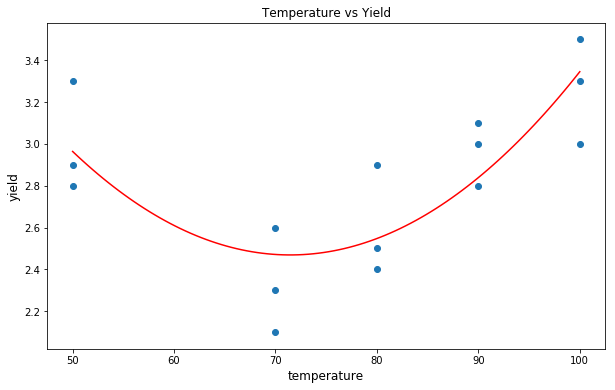

In [12]:
display_poly_data(model, X_train, y_train)


### Display the equation of polynomial curve


In [13]:
def print_equation(model):
    coef1 = model.coef_[0][0]
    coef2 = model.coef_[0][1]
    intercept = model.intercept_[0]
    print('Equation of curve is')
    print('y =  {:0.3f} + {:0.3f}x  + {:0.3f}x^2'.format(intercept , coef1, coef2))  
    



In [14]:
#Print the equation of curve
print_equation(model)

Equation of curve is
y =  7.960 + -0.154x  + 0.001x^2


## Polynomial Model of High Degree: Overfitting
We will train a polynmial  model of degree 20 to see how it leads to overfiiting

In [15]:
poly_features = PolynomialFeatures(degree = 20, include_bias = False)
X_poly = poly_features.fit_transform(X_train)

X_poly[:2]

array([[5.00000000e+01, 2.50000000e+03, 1.25000000e+05, 6.25000000e+06,
        3.12500000e+08, 1.56250000e+10, 7.81250000e+11, 3.90625000e+13,
        1.95312500e+15, 9.76562500e+16, 4.88281250e+18, 2.44140625e+20,
        1.22070313e+22, 6.10351562e+23, 3.05175781e+25, 1.52587891e+27,
        7.62939453e+28, 3.81469727e+30, 1.90734863e+32, 9.53674316e+33],
       [5.00000000e+01, 2.50000000e+03, 1.25000000e+05, 6.25000000e+06,
        3.12500000e+08, 1.56250000e+10, 7.81250000e+11, 3.90625000e+13,
        1.95312500e+15, 9.76562500e+16, 4.88281250e+18, 2.44140625e+20,
        1.22070313e+22, 6.10351562e+23, 3.05175781e+25, 1.52587891e+27,
        7.62939453e+28, 3.81469727e+30, 1.90734863e+32, 9.53674316e+33]])

### Train the model

Train the model with polynomial features of degree 20 and print rmse sacore

In [16]:
model = LinearRegression( )
model.fit(X_poly, y_train)


y_pred = model.predict(X_poly)
mse = mean_squared_error(y_train, y_pred)

rmse = np.sqrt(mse)
print('Training RMSE is', rmse)

Training RMSE is 0.196638416050035


#### Display  the model. 

Even though training score is improved it is not a good model becasue this model will perform poorly on. This model tries to pass through each and every data point but in the process it takes big deviations as can be seen for temeprature values between 90 and 100

For example if a new data point is predicted with temeperature of around 97, it will predict a negative yield which is unrealistic prediction

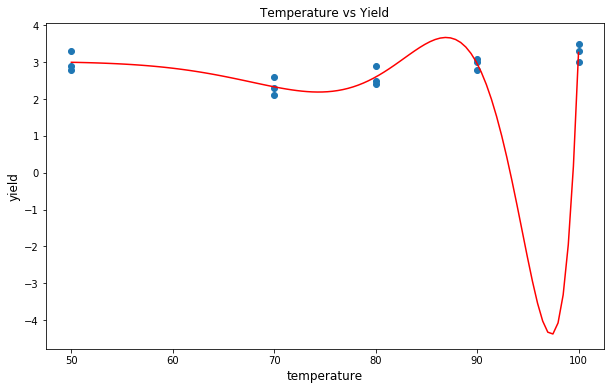

In [17]:
display_poly_data(model, X_train, y_train)